# <center>KERATOCONUS DETECTION SOLUTION</center>

### BACKGROUND TO THE ANALYSIS
The development of machine learning has provided man with the exceptional combination of human creativity and machine speed in proffering advanced solutions to difficult problems.

This project intend to apply AI solutions to the detection of Keratoconus which ordinarily would require both time consumption and experts services.

### FEASIBILITY OF THE SELECTED DATA
hen X, Zhao J, Iselin KC, et al, in their research work on “Keratoconus detection of changes using deep learning of colour-coded maps,“ discussed on the significant processes undergone to ensure that the images are a real representation of the Keratoconus eye problem, and the combined images represents two category of people.
* Volunteers with Keratoconus
* Volunteers with Healthy eyes <br>

This was provided by three centers (1 hospital and 2 clinics).
The images are scanned results from corneal tomography which is a non-invasive diagnostic imaging test that produces a 3D (three dimensional) map of the cornea, and this is meant to assess the shape, thickness and curvature of the cornea which is important for this analysis.
[source : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8392046/]

### USERS AND REQUIREMENT
This project seeks to provide AI driven solutions that can aid the quick detection of Keratoconus at the early stages of the portrusion of the retina, so as to reduce the number of people who eventually suffers from the late detection of the eye problem.

### SYSTEM DESIGN
The whole system is structured into 6 different phases;

1. Data Loading Phase : In this phase, the use of tensorflow (keras) framework to load the images proved to be more effective, especaiily as it offers the additional opportunity to apply some level of optimization on the dataset, such as loading in batches (for efficiency), shuffling the loading processes (to avoid overfitting in the model training stage), automate the image resizing as well as split the dataset into training and validation sizes using the training data.

2. Preprocessing : Because the images consists of 3D data, proper structuring of the data is needed to further make it well tuned for modelling. And this phase is further categorized into:
    * Data standardization phase (Rescaling of the data from RGB structure [0, 255] to [0, 1] format)
    * Data performance configuration phase (using caching and prefetching to reduce data loading time during model training) 
    <br>
    
3. Model architecture building phase : Proper consideration were made in determining the appropriate model to set up, so as to manage the computing resources available (4gb RAM on a core i5 CPU architecture). The modelling phase will implement two separate models (A very basic CNN architecture [structural] and a customized CNN architecture [functional])  

4. Model training and validation phase : The model was trained using the training data as well as provided with a validation set that monitors the performance of the training process.

5. Model testing : After the training, the model's performance is assessed by comparing the prediction from the model and the actual result of the test data.

6. Hyper-parameter tuning : The models showed a prospect for improvement, which is where hyper-tuning comes into play.

The model design is summary is in the code

### TRAINING AND TESTING
The training data used had 2961 image files, of which the actual segmentation had 2369 (80%) as the training data and 592 (20%) as the validation data which will both be fit into the two models, while 1050 image files will be used as test data; and also the testing will run in batches of 32 for each iteration.
For the first model, the epoch used to fit the training and validation data is 10 while that of the custom model will run 20 epochs with additional callbacks which monitors model's performance inorder to avoid overfitting.

### DEPLOYMENT CHALLENGES
After finetuning the model's performance, the use case will only be possible if the test images conform with corneal tomography scan which prepares the image in the right structure, else the solution would not be of any significant use during implementation.

In [1]:
#import libraries

#basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#machine learning
import tensorflow as tf 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, LeakyReLU, Dense, Dropout, add
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, History
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, Input
from tensorflow.keras.utils import plot_model

# install keras tuner
!pip install -q -U keras-tuner

import keras_tuner as kt

#extras
import glob
import math
import os

In [2]:
# files for this project

for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive\Independent Test Set\Independent Test Set\Keratoconus\case1\KCN_1_CT_A.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case1\KCN_1_EC_A.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case1\KCN_1_EC_P.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case1\KCN_1_Elv_A.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case1\KCN_1_Elv_P.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case1\KCN_1_Sag_A.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case1\KCN_1_Sag_P.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case10\KCN_10_CT_A.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case10\KCN_10_EC_A.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case10\KCN_10_EC_P.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case10\KCN_10_Elv_A.jpg
archive\Independent Test Set\Independent Test Set\Keratoconus\case10\KCN_1

archive\Train_Validation sets\Train_Validation sets\Normal\case14\NOR_14_CT_A.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case14\NOR_14_EC_A.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case14\NOR_14_EC_P.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case14\NOR_14_Elv_A.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case14\NOR_14_Elv_P.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case14\NOR_14_Sag_A.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case14\NOR_14_Sag_P.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case140\NOR_140_CT_A.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case140\NOR_140_EC_A.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case140\NOR_140_EC_P.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case140\NOR_140_Elv_A.jpg
archive\Train_Validation sets\Train_Validation sets\Normal\case140\NOR_140_Elv_P.jpg


In [3]:
# dataset directory
train_dir = "archive/Train_Validation sets/Train_Validation sets"
test_dir = "archive/Independent Test Set/Independent Test Set"

In [4]:
# using a function to do the preview the images
def folderPreview(folder_name, case_no):
    """
    A function to plot images found in the specified folder and the selected case. 
    """
    #Get the filenames to be used
    fn = folder_name.capitalize()
    cn = case_no
    fs = []
    for dirname, _, filenames in os.walk(f'archive\Train_Validation sets\Train_Validation sets\\{fn}\case{cn}'):
        for filename in filenames:
            fs.append(os.path.join(dirname, filename))
    
    #Plot settings
    plt.rc('axes', grid=False)
    _, axs = plt.subplots(1, 7, sharex='col', sharey='row', figsize=(15, 6))
    axs = axs.ravel()
    
    #Plotting the images in the selected directory
    for i, (image_dir, img_name) in enumerate(zip(fs, filenames)):
        # set the ticks to be empty
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
        img = mpimg.imread(image_dir)
        axs[i].imshow(img)
        axs[i].set_title('{}'.format(img_name))

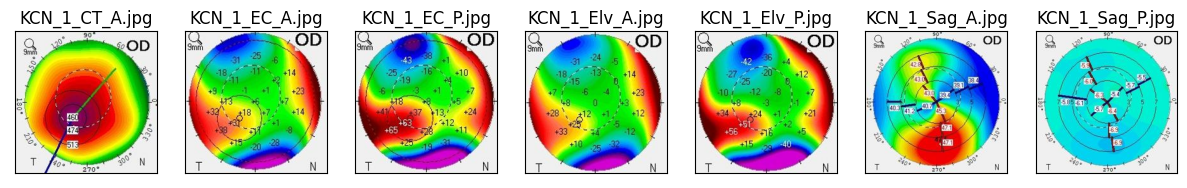

In [5]:
# preview case one folder containing keratoconus images
folderPreview('keratoconus', '1')

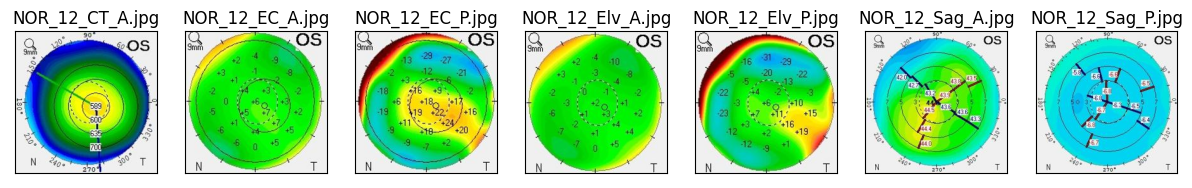

In [6]:
# preview case twelve folder containing Normal images
folderPreview('normal', '12')

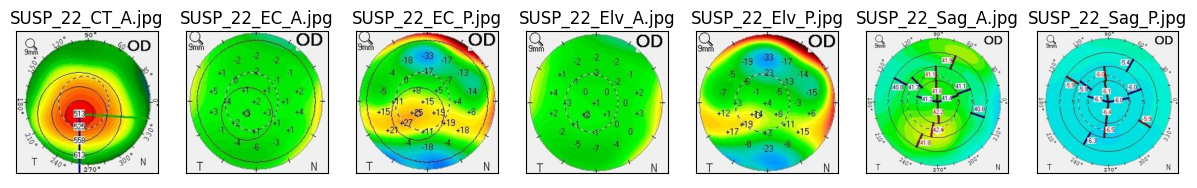

In [7]:
# preview case twenty-two folder containing Suspect images
folderPreview('suspect', '22')

## <center>FEATURE ENGINEERING</center>

### DATASET PREPROCESSING

* Working with images can be challenging if not for the innovative development of machine learning frameworks which enables the loading of the image file into memory using matplotlib, and this converts it into series of numbers that computer understands (as computer cannot perceive images). But in this analysis, keras implementation wrapped into a function that loads data from directory will be used.

* Coloured images (as well as grey images) contains a 3-d arrays of data, the first two dimensions stores the image's height and width (the number of pixels) while the last dimension stores pixel values for the red, green and blue colour codes (i.e. hue)
<br>

(Reference -> **https://www.folio3.ai/blog/best-cnn-architecture-for-image-processing/**)

* To proceed with this analysis, the following steps will be implemented.
    1. Load images with `tf.keras.utils.image_dataset_from_directory` and 
    2. Transform the output using `tf.data.Dataset` with preprocessing layers.

<br>

* To achieve this, a python function that receives the location of the images, and some extra parameters, then load all the images in that directory, generate the data, and returns a batched dataframe will be used inorder to implement DRY (Don't Repeat Yourself) pythonic principle.

#### DATA GENERATOR STRUCTURE

* Batch size = 32
* Image height and width = 90
* Percent = 20% for training and validation data
* Shuffle = True
* Seed = 43 (A random selection)
* Label model = default is int, while the test data used categorical
* Direction = (training or validation)

In [8]:
#import tensorflow_datasets as tfds
def dataGenerator(data_dir, direction, percent, lm='int', shuffle=True):
    """
    A function that receives the location of images and return the dataframe after generating the required data.
    """
    
    # define some parameters for the loader
    batch_size = 32
    img_ht = 90 # image height
    img_wt = 90 # image width
    if not percent is None:
        percent = percent / 100
    
    # Using a validation split of 20% and training of 80%
    data_gen = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=percent, label_mode=lm,
                                                           subset=direction, seed=43, image_size=(img_ht, img_wt), 
                                                           batch_size=batch_size, shuffle=shuffle)
    return data_gen

In [9]:
# load the training data
train_ds = dataGenerator(train_dir, 'training', 20)

Found 2961 files belonging to 3 classes.
Using 2369 files for training.


In [10]:
# load the training validation data
train_val = dataGenerator(train_dir, 'validation', 20)

Found 2961 files belonging to 3 classes.
Using 592 files for validation.


In [11]:
# load the testing data
test_ds = dataGenerator(test_dir, None, None, lm='categorical')

Found 1050 files belonging to 3 classes.


In [12]:
# training data classes
train_ds.class_names

['Keratoconus', 'Normal', 'Suspect']

In [13]:
# testing data classes
test_ds.class_names

['Keratoconus', 'Normal', 'Suspect']

* Shape of the generated dataset

In [14]:
# Since this is a batched data, the shape is located in the element_spec method
input_shape = train_ds.element_spec[0].shape[1:]
input_shape

TensorShape([90, 90, 3])

The data RGB channel values are presented in the [0, 255] range, which is not suitable for a neural network; so there is a need to make the input values small by standardizing the values to be in the [0, 1] range, using tf.keras.layers.Rescaling:

* Standardize the dataset by using 
    1. tf.keras.layers.Rescaling for rescaling and 
    2. dataset.map to apply the standardization to the data.

In [15]:
#data rescaling function
def dataNormalisation(data):
    """
    A data normalisation function.
    """
    # rescaling layers
    layer_normalization = tf.keras.layers.Rescaling(1./255)
    
    #apply the function
    normalized_ds = data.map(lambda x, y: (layer_normalization(x), y))
    
    return normalized_ds

In [16]:
# apply it to the train dataset
normalized_train = dataNormalisation(train_ds)

In [17]:
# apply this for the validation dataset
normalized_val = dataNormalisation(train_val)

In [18]:
# also apply for the test
normalized_test = dataNormalisation(test_ds)

### DATASET PERFORMANCE CONFIGURATION

From tensorflow website, these two steps are necessary for efficient performance during modelling

The use of buffered prefetching to yield data from disk without having I/O experiencing any blocking. 

These are two important methods to use when loading data:

* Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, this method can be used to create a performant on-disk cache.
* Dataset.prefetch overlaps data preprocessing and model execution while training.

* For efficient implementation across the datasets, function will be used



In [19]:
# data performance function

def dataPerformance(data):
    """
    A function that applies buffered prefetching to the provided data.
    """
    
    # data tuning function
    # Provide a consistent integer value for the prefetching buffer size
    AUTOTUNE = tf.data.AUTOTUNE
    
    # apply the tuning function in both the cache and prefetch performance configuration.
    new_data = data.cache().prefetch(buffer_size=AUTOTUNE)
    
    return new_data

In [20]:
# apply to the train data
train_pf = dataPerformance(normalized_train)
val_pf = dataPerformance(normalized_val)

#apply to the test data
test_pf = dataPerformance(normalized_test)

## <center> MODELLING </center>

### Model Training

**Using two(2) models**

* A simple model and
* A customized model (layers, paddings and regularization). 

Then measure the performance of the two models.

#### MODEL ARCHITECTURE STRUCTURE

**Overview**

* **Conv2D** - Creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
* **MaxPooling2D** - Downsamples the input along its spatial dimensions (height, and width)
* **Flatten** - Flattens the input. Does not affect the batch size. before passing into the Dense layer
* **Dense** - The regular densely-connected NN layer. <br>
*Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).* **(source -> Docstring)**
* **GlobalAveragePooling2D** - pooling operation for spatial data. A structural regularizer that enforces explicitly feature maps to become confidence maps of concepts (categories).
* **Dropout** - Applies dropout to the input which helps prevent overfitting.

*Extra Parameters*

* **Adam optimizer** - Optimizer that implements the Adam algorithm. <br>
*Adam optimization is a stochastic gradient descent method that is based on
adaptive estimation of first-order and second-order moments.*
* **tf.keras.losses.SparseCategoricalCrossentropy** - Computes the crossentropy loss between the labels and predictions. <br> 
*Used when there are two or more label classes*
* **Accuracy metrics** - Calculates how often predictions equal labels.

*Callbacks*
* **ReduceLROnPlateau** - Reduce learning rate when a metric (in this case val_loss) has stopped improving. <br>
*This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.*
* **EarlyStopping** - Stop training when a monitored metric (in this case, val_loss) has stopped improving.

In [21]:
def simpleModel(train_data, validation_data, epoch):
    """
    A model function that uses the training data for training and validation data for validation, then return the trained model.
    """
    #number of class names in the data
    num_classes = 3
    
    # a customized version taken from tensorflow website (https://www.tensorflow.org/tutorials/load_data/images#train_a_model)
    # cnn model
    model = Sequential([
        Conv2D(32, 3, activation='relu'),
        MaxPooling2D(), # Downsamples the input along its spatial dimensions (height, and width),
        Conv2D(32, 3, activation='relu'),
        MaxPooling2D(),
        Conv2D(32, 3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes)
    ])
    
    # tf.keras.optimizers.Adam optimizer and 
    # tf.keras.losses.SparseCategoricalCrossentropy loss function. 
    # To view the training and validation for each training epoch, using ACCURACY for the metrics argument in Model.compile.
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])
    
    # fit the model
    model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epoch) #multiple test showed that the 8th epoch had better result
    
    return model

In [22]:
history = History()

# Implement the function, using an epoch of 10 to ascertain the performance
smodel = simpleModel(train_pf, val_pf, epoch=10)

Epoch 1/10
75/75 [==============================] - 22s 264ms/step - loss: 0.8808 - accuracy: 0.5530 - val_loss: 0.8249 - val_accuracy: 0.5929
Epoch 2/10
75/75 [==============================] - 17s 227ms/step - loss: 0.7145 - accuracy: 0.6336 - val_loss: 0.6298 - val_accuracy: 0.6402
Epoch 3/10
75/75 [==============================] - 14s 192ms/step - loss: 0.6323 - accuracy: 0.6695 - val_loss: 0.5926 - val_accuracy: 0.6824
Epoch 4/10
75/75 [==============================] - 15s 194ms/step - loss: 0.5867 - accuracy: 0.7070 - val_loss: 0.5823 - val_accuracy: 0.6892
Epoch 5/10
75/75 [==============================] - 16s 207ms/step - loss: 0.5556 - accuracy: 0.7218 - val_loss: 0.5589 - val_accuracy: 0.7078
Epoch 6/10
75/75 [==============================] - 15s 200ms/step - loss: 0.5350 - accuracy: 0.7336 - val_loss: 0.5785 - val_accuracy: 0.6875
Epoch 7/10
75/75 [==============================] - 15s 194ms/step - loss: 0.5016 - accuracy: 0.7615 - val_loss: 0.5235 - val_accuracy: 0.7297

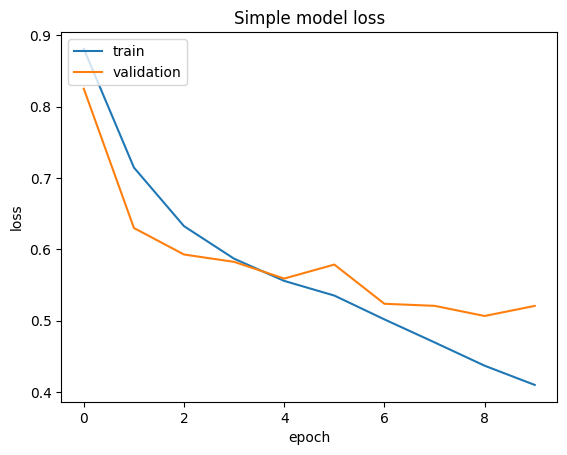

In [23]:
#visualise the loss function
plt.plot(smodel.history.history['loss'])
plt.plot(smodel.history.history['val_loss'])
plt.title('Simple model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* From the plot, it shows how the model is moving towards overfitting of the data, because while the training value loss is reducing, the validation value loss is not following in the right proportion, which suggests overfitted model. It is very likely that the model may not perform well during the test phase

In [24]:
# Second model

def customModel(train_data, validation_data, epoch):
    """
    A model function that uses the training data for training and validation data for validation, then return the trained model.
    """
    #number of class names in the data
    num_classes = 3
    
    # cnn model
    inputs = Input(shape=input_shape, name='cm_input') # input shape for the model
    conv = Conv2D(32, 3, activation='relu', name='cm_conv_1')(inputs) # first convolution layer
    x = Conv2D(64, 3, activation='relu', name='cm_conv_2')(conv) # pass the input into the dense layer
    output_b_1 = MaxPooling2D(3)(x) #apply a regularization on the model
    
    x = Conv2D(64, 3, activation="relu", padding="same")(output_b_1)
    x = Conv2D(64, 3, activation="relu", padding="same")(x)
    output_b_2 = add([x, output_b_1])
    
    x = Conv2D(64, 3, activation="relu", padding="same")(output_b_2)
    x = Conv2D(64, 3, activation="relu", padding="same")(x)
    output_b_3 = add([x, output_b_2])

    x = Conv2D(64, 3, activation="relu")(output_b_3)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation="relu")(x)
    outputs = Dense(3)(x)

    model = Model(inputs, outputs, name="custom_model")
    
    #callbacks
    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.0000001),
        EarlyStopping(monitor='val_loss', patience=5, verbose=0)
    ]
    
    # tf.keras.optimizers.Adam optimizer and 
    # tf.keras.losses.SparseCategoricalCrossentropy loss function. 
    # To view the training and validation for each training epoch, using ACCURACY for the metrics argument in Model.compile.
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])
    
    # fit the model
    model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epoch, 
        callbacks=callbacks)
    
    return model

In [25]:
# using the modified model with more layers and regularization and starting with an epoch of 20
cusmodel = customModel(train_pf, val_pf, epoch=20)

Epoch 1/20
75/75 [==============================] - 70s 908ms/step - loss: 0.9696 - accuracy: 0.5272 - val_loss: 0.8964 - val_accuracy: 0.5304 - lr: 0.0010
Epoch 2/20
75/75 [==============================] - 72s 958ms/step - loss: 0.8885 - accuracy: 0.5656 - val_loss: 0.8795 - val_accuracy: 0.5490 - lr: 0.0010
Epoch 3/20
75/75 [==============================] - 67s 894ms/step - loss: 0.8698 - accuracy: 0.5711 - val_loss: 0.8680 - val_accuracy: 0.5524 - lr: 0.0010
Epoch 4/20
75/75 [==============================] - 72s 962ms/step - loss: 0.8537 - accuracy: 0.5893 - val_loss: 0.8379 - val_accuracy: 0.5929 - lr: 0.0010
Epoch 5/20
75/75 [==============================] - 67s 889ms/step - loss: 0.8394 - accuracy: 0.5956 - val_loss: 0.8197 - val_accuracy: 0.6030 - lr: 0.0010
Epoch 6/20
75/75 [==============================] - 70s 931ms/step - loss: 0.8058 - accuracy: 0.6167 - val_loss: 0.8258 - val_accuracy: 0.6030 - lr: 0.0010
Epoch 7/20
75/75 [==============================] - 74s 984ms/st

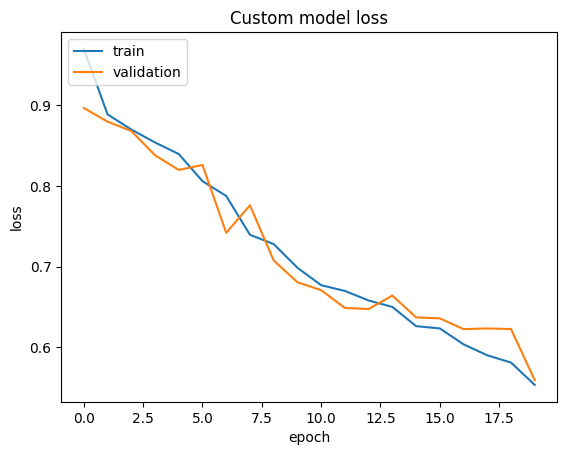

In [26]:
#visualise the loss function
plt.plot(cusmodel.history.history['loss'])
plt.plot(cusmodel.history.history['val_loss'])
plt.title('Custom model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* The plot depicts a steadily improving model across different epochs, which shows that the more the model is trained, the better it becomes. But due to computational limitations, 20 epochs will be used to testrun the model.

In [27]:
#Result prediction function
def predResult(model, model_name):
    i = 0
    result = []
    for x, y in test_pf:
        i += 1
        preds = model.predict(x, verbose=0)
        idx = np.argmax(preds, axis=1)
        y = np.argmax(y, axis=1)
        result.append(np.sum((y == idx)*1)/32)
    perf = sum(result)/len(result)
    print(f"{model_name} Model's average performance is {round(perf*100, 2)}")

In [28]:
# simple model
predResult(smodel, 'Simple')

Simple Model's average performance is 53.6


In [29]:
# customized model
predResult(cusmodel, 'Customized')

Customized Model's average performance is 61.65


In [30]:
# preview the best performance along the batch iteration of the test data

def bestPrediction(model):
    """
    A function that checks each batch prediction, then select the best accurate prediction and 
    plot the predicted vs actual plot.
    """
    result = [0] #initial result
    idx = 0 # index watch to use in locating the test data batch to use for the plot
    for a, b in test_pf:
        pred = model.predict(a, verbose=0) # prediction
        rst = np.argmax(pred, axis=1) # result after scaling using numpy argmax function
        b = np.argmax(b, axis=1) # similar scaling is done on the actual value
        cor_pred = int(round((np.sum((b == rst)*1)/32)*100, 1)) # calculate the percent of correctly predicted images
        prev = result[-1] #index the last element in the result list
        if type(prev).__name__ != 'int' and len(prev) > 1: #to avoid running into errors in the process
            prev = prev[0]
        if prev < cor_pred:
            result = []
            result.append([cor_pred, idx, rst])
        else:
            result.append(prev)
        idx += 1
    
    print(f"Best performance in batches has accuracy score of {result[0][0]}%")
    x, y = list(test_pf)[result[0][1]] #get the test data
    b = result[0][-1]
    y = np.argmax(y, axis=1)
    
    fig = plt.figure(1, (14, 14))

    kcn_class = {0: "Keratoconus", 1: "Normal", 2: "Suspect"}

    axis = 0
    
    #using the length of the selected test batch data to iterate throught the values
    for i in range(len(x)):
        px = x[i] #values to plot
        axis += 1 # increment the axis to use
        ax = plt.subplot(8, 8, axis) #subplot the values
        ax.imshow(px, cmap='gray') 
        
        # set the ticks to be empty
        ax.set_xticks([])
        ax.set_yticks([])
        
        # correctly predicted values
        if  kcn_class[y[i]] == kcn_class[b[i]]:
            for side in ['top','bottom','left','right']:
                ax.spines[side].set_linewidth(5)
                ax.spines[side].set_color('green')
            ax.set_title(kcn_class[b[i]])
        
        # wrong prediction plot
        else:
            for side in ['top','bottom','left','right']:
                ax.spines[side].set_linewidth(5)
                ax.spines[side].set_color('red')
            ax.set_title('Pred:'+kcn_class[b[i]]+" \nActu:"+kcn_class[y[i]])
        plt.tight_layout()

Best performance in batches has accuracy score of 68%


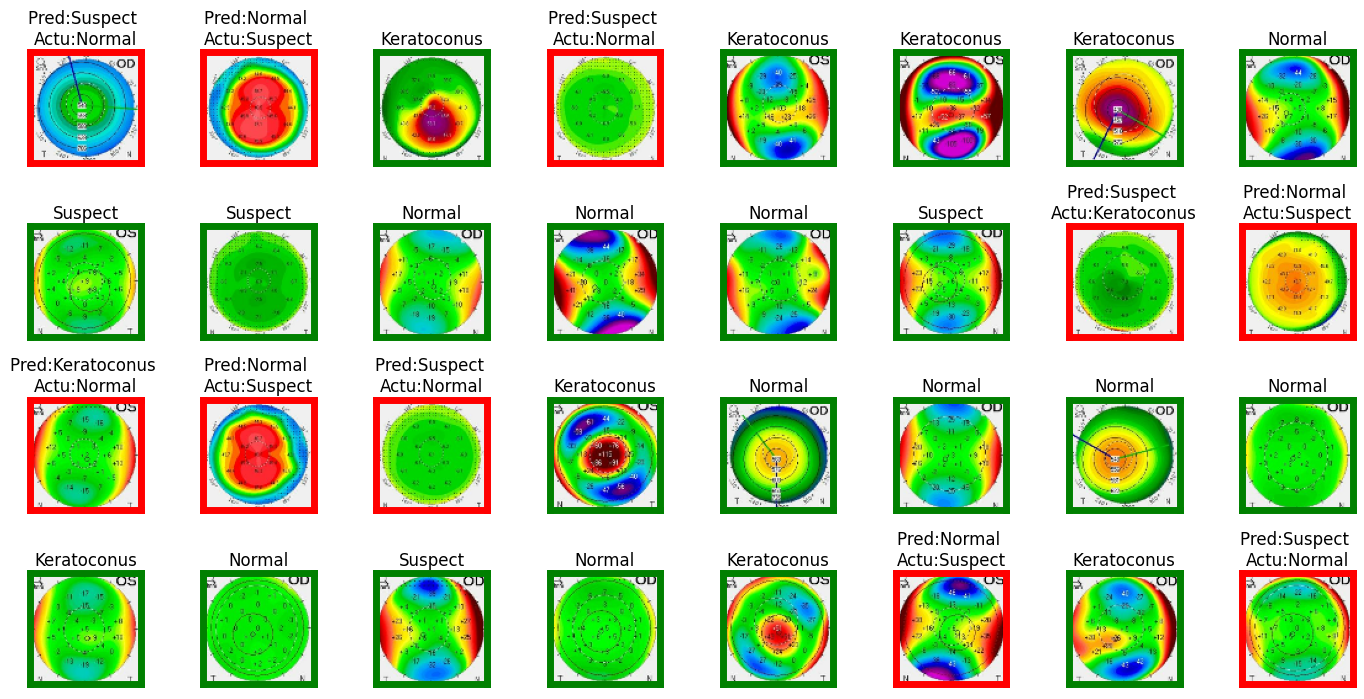

In [31]:
# simple model
bestPrediction(smodel)

Best performance in batches has accuracy score of 84%


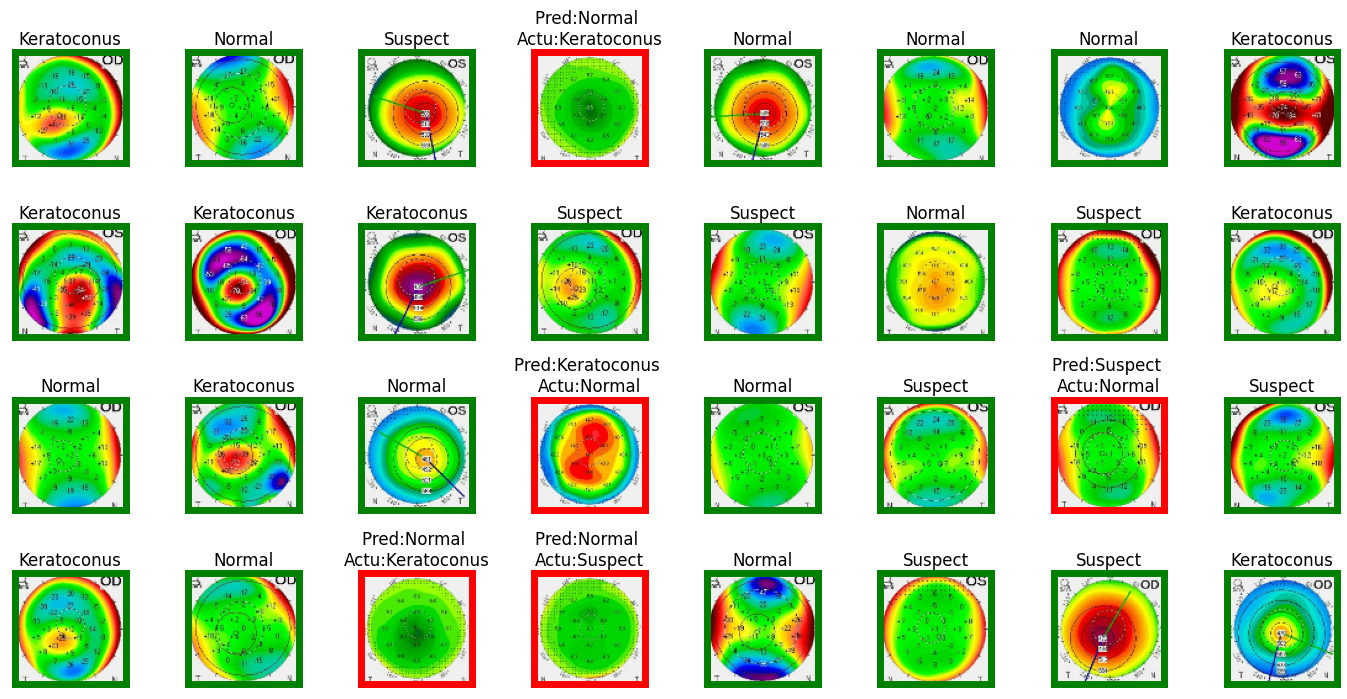

In [32]:
# custom model
bestPrediction(cusmodel)

### SUMMARY OF EACH MODEL

In [33]:
# SIMPLE MODEL
smodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 88, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 32)         0

In [34]:
# CUSTOM MODEL
cusmodel.summary()

Model: "custom_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cm_input (InputLayer)          [(None, 90, 90, 3)]  0           []                               
                                                                                                  
 cm_conv_1 (Conv2D)             (None, 88, 88, 32)   896         ['cm_input[0][0]']               
                                                                                                  
 cm_conv_2 (Conv2D)             (None, 86, 86, 64)   18496       ['cm_conv_1[0][0]']              
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 28, 28, 64)  0           ['cm_conv_2[0][0]']              
                                                                                       

### OBSERVATION FROM MULTIPLE MODEL TESTING

* The repeated task of model testing has some benefits and setbacks which is why the use of hyper-parameter tuning gained popularity in the history of machine learning and AI. After multiple model testing, the custom model's performance yielded a better result when compared to the simple model used initially.
* This can be attributed to the manual method of finetuning the model which was tested using different values repeatedly. So going forward, **KERAS TUNER** will be applied to the custom model, to discover if there would be improvement in the model's predictive power.
* One notable observation was, the higher the epochs on the custom model, the better the model trained, but this could result in overfitting of the model, which was why callbacks was implemented, to checkmates overfitting, but let's see if hyper-tuning might be of help in this case.

### MODEL HYPER-PARAMETER TUNING STEPS

In building a model for hypertuning, the hyperparameter search space will be defined in addition to the model architecture (following the guide from tensorflow). 

The hypermodel (the model set up for hypertuning) can be defined using two approaches.

* By using a model builder function
* By subclassing the HyperModel class of the Keras Tuner API

Tensorflow have two pre-defined HyperModel classes - HyperXception and HyperResNet for computer vision applications, which can also be used, but for now, a custom version will be used.

This model builder class is going to return a compiled model and uses hyperparameters defined inline, to hypertune the model.

In [35]:
class TuneHyperModel(kt.HyperModel):
    def build(self, hp):
        inputs = Input(shape=input_shape)
        x = inputs
        # Number of layers of the CNN is also a hyperparameter.
        for i in range(hp.Int("cnn_layers", 1, 3)):
            x = Conv2D(
                hp.Int(f"filters_{i}", 32, 128),
                kernel_size=(3, 3),
                activation="relu",
            )(x)
            x = Conv2D(
                hp.Int(f"filters_{i}", 64, 512),
                kernel_size=(3, 3),
                activation="relu",
            )(x)
            x = MaxPooling2D(pool_size=(3))(x)
        x = Conv2D(
                hp.Int(f"filters_{i}", 128, 512),
                kernel_size=(3, 3),
                activation="relu",
            )(x)
        x = GlobalAveragePooling2D()(x)

        x = Dense(
                units=hp.Int("units", min_value=32, max_value=512, step=32),
                activation="relu",
            )(x)

        # A hyperparamter for whether to use dropout layer.
        if hp.Boolean("dropout"):
            x = Dropout(0.5)(x)

        # The last layer contains 3 units,
        # which is the same as the number of classes.
        outputs = Dense(units=3)(x)
        model = Model(inputs=inputs, outputs=outputs)

        # Compile the model.
        model.compile(
            loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
        )
        
        return model
    
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            # Tune whether to shuffle the data in each epoch.
            shuffle=hp.Boolean("shuffle"),
            **kwargs,
        )

In [36]:
# Train the model
hp = kt.HyperParameters()
hypermodel = TuneHyperModel()
model = hypermodel.build(hp)
hypermodel.fit(hp, model, train_pf)

75/75 [==============================] - 30s 384ms/step - loss: 1.2025 - accuracy: 0.4664


In [37]:
# Search the model
tuner = kt.RandomSearch(
    TuneHyperModel(),
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=2,
    overwrite=True,
    directory="kcn",
    project_name="hypermodel_tuning",
)

tuner.search(train_pf, epochs=3, validation_data=val_pf)

Trial 2 Complete [00h 04m 30s]
val_loss: 1.0986120700836182

Best val_loss So Far: 1.0986120700836182
Total elapsed time: 00h 04m 30s
INFO:tensorflow:Oracle triggered exit


In [38]:
# Retrain the model
hypermodel = TuneHyperModel()
best_hp = tuner.get_best_hyperparameters()[0]
model = hypermodel.build(best_hp)
hypermodel.fit(best_hp, model, train_pf, epochs=3)

Epoch 1/3
75/75 [==============================] - 82s 1s/step - loss: 1.4511 - accuracy: 0.3263
Epoch 2/3
75/75 [==============================] - 84s 1s/step - loss: 1.1280 - accuracy: 0.3453
Epoch 3/3
75/75 [==============================] - 79s 1s/step - loss: 1.1091 - accuracy: 0.3457


### HYPERTUNING RESULTS

* After multiple epochs runtime ranging from the random searching to the hypermodel retraining, the model hypertuning did not perform better than the initial parameters used in the custom model.
* Therefore, the tuning suggestions would be ignored.

## CONCLUSION

#### The whole process revealed that deep learning has so much still to offer, the development of a solution for detecting Keratonocus is an innovation that will boost the effect of ML and AI in the health sector.

**In conclusion**
* The process of loading the dataset and carrying out EDA was well implemented.
* During the data loading phase, the use of *shuffle* parameter helped to avoid model overfitting the data.
* The model building phase showed that even CNN simple model can achieve up to 70% accuracy on new test case.
* The custom model showed a better performance than the simple model, and also provided an opportunity to further inprove the model's generalizing ability if the epochs size is increased while retaining the callbacks setup. Though this would require more computational structure for better result.
* The hyper-parameter finetuning phase did not provide solutions in terms of the parameter settings to be used for the custom model.

## RECOMMENDATION

* To further improve this work, there is need to for more training data.
* The batch size used affected the model's performance, so further studies needs to be carried out to ascertain the most suitable batch size to use for this analysis (when using a very robust computation system).
* This solution used two basic model architecture, for further work, there is a need to try other complex architectures such as the vgg16 model which has a robust architecture.
* The choice of accuracy as a metric is to determine the number of cases that were correctly predicted, in addition to this metric, other metrics can be utilized as well.
* Also, future solution should implement a shuffled data loading as it helped to avoid overfitting of data.

In [39]:
plot_model(smodel, 'simple model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
